In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
sns.set()
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#cccccc'})
%matplotlib auto
from PIL import Image
import pandas as pd

Using matplotlib backend: Qt5Agg


In [2]:
gB = 1.4400324117846943
gG = 1.5335689920700644
gR = 1.5526529746220272

In [11]:
df = pd.read_excel('cvals.xlsx')

In [12]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,0.0,w,186.0,188,216
1,1,1,NaN,m,189.0,95,128
2,1,1,NaN,c,18.0,132,173
3,1,1,NaN,y,206.0,195,136
4,1,2,NaN,w,178.0,183,217


In [13]:
# # linearize values.
# def linearizeRows(row):
#     row.r = 
# df.transform(linearizeRows, axis=1)

In [14]:
df.r = np.power(df.r.values, gR)
df.g = np.power(df.g.values, gG)
df.b = np.power(df.b.values, gB)

In [15]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,0.0,w,3340.150409,3073.108973,2299.794682
1,1,1,NaN,m,3424.169006,1078.886095,1082.556706
2,1,1,NaN,c,88.920642,1786.678561,1670.547880
3,1,1,NaN,y,3914.108161,3250.319630,1181.313535
4,1,2,NaN,w,3119.760900,2948.660943,2315.142596


In [16]:
# # normalize values.
def normalizeRows(row):
    total = row.r + row.g + row.b
    row.r = row.r / total
    row.g = row.g / total
    row.b = row.b / total
#     print(row.sq)
    if row.sq == 'w':
        row.sq = 'white'
    elif row.sq == 'c':
        row.sq = 'cyan'
    elif row.sq == 'm':
        row.sq = 'magenta'
    else:
        row.sq = 'yellow'
#     print(row.sq)
        
    return row
df = df.transform(normalizeRows, axis=1)

In [17]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,0.0,white,0.383350,0.352702,0.263948
1,1,1,NaN,magenta,0.613034,0.193155,0.193812
2,1,1,NaN,cyan,0.025075,0.503837,0.471088
3,1,1,NaN,yellow,0.468995,0.389458,0.141547
4,1,2,NaN,white,0.372128,0.351719,0.276153


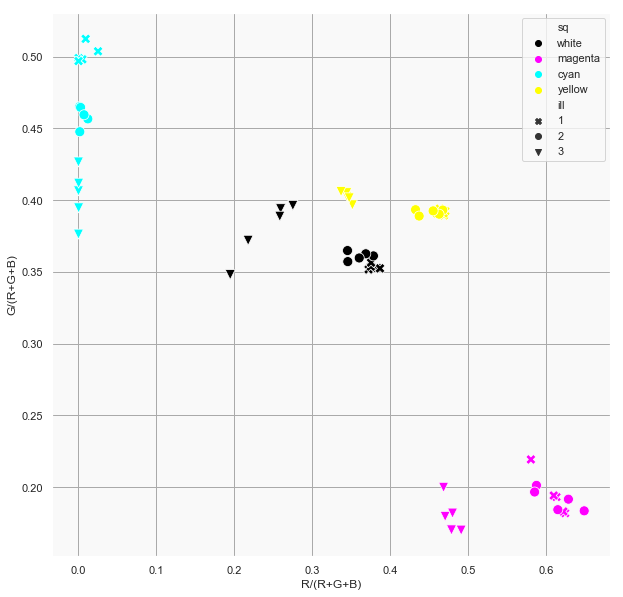

In [18]:
plt.figure(figsize=(10, 10))
plt.rcParams['axes.facecolor'] = '#f9f9f9'
plt.grid(color='#aaaaaa')
palette = {'white':'black', 'magenta':'magenta', 'yellow': 'yellow', 'cyan': 'cyan'}
ax = sns.scatterplot(df.r, df.g,  style=df.ill, hue=df.sq, markers={1:'X', 2:'o', 3:'v'}, palette=palette, s=100)
# plt.xlabel = 'R/(R+G+B)'
ax.set(xlabel='R/(R+G+B)', ylabel='G/(R+G+B)')
plt.show()